In [19]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [20]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [21]:
X_test.shape

(10000, 28, 28)

In [22]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

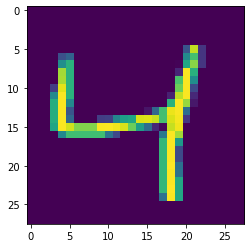

In [23]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [24]:
X_train = X_train/255
X_test = X_test/255

In [25]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [26]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [29]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2761 - accuracy: 0.9197 - val_loss: 0.1418 - val_accuracy: 0.9597
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1157 - accuracy: 0.9653 - val_loss: 0.1190 - val_accuracy: 0.9642
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0831 - accuracy: 0.9749 - val_loss: 0.0919 - val_accuracy: 0.9709
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0615 - accuracy: 0.9816 - val_loss: 0.1028 - val_accuracy: 0.9694
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0491 - accuracy: 0.9843 - val_loss: 0.1097 - val_accuracy: 0.9668
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0376 - accuracy: 0.9876 - val_loss: 0.1127 - val_accuracy: 0.9693
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0309 - accuracy: 0.9894 - val_loss: 0.0997 - val_accuracy:

In [30]:
y_prob = model.predict(X_test)

In [31]:
y_pred = y_prob.argmax(axis=1)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9757

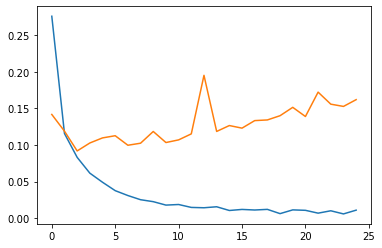

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

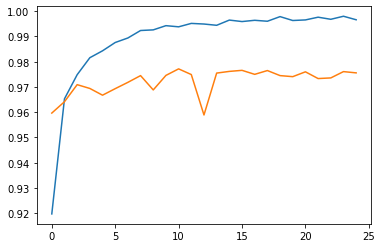

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

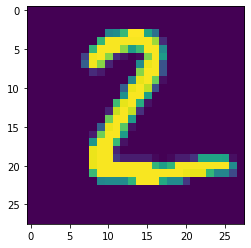

In [35]:
plt.imshow(X_test[1])

In [36]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

array([2], dtype=int64)